# **去哪儿网旅游研究**

# **清洗数据**

In [33]:
import numpy as np
import pandas as pd 
import seaborn as sns
from pyecharts.commons.utils import JsCode
from pyecharts.charts import *
from pyecharts import options as opts
import matplotlib.pyplot as plt
from snapshot_selenium import snapshot
from pyecharts.render import make_snapshot

In [34]:
#数据处理
df_qne = pd.read_csv('C:/Users/Cyberolic/Desktop/Data.csv', header=0)
df_qne.head()

,旅游地点,标题,出发时间,天数,人均费用,人物,玩法,浏览量,详情URL
0,于都旅游攻略,【江西.于都】新长征再出发，不忘初心之旅,2021/11/19,4,2000.0,三五好友,深度游,173,https://travel.qunar.com/travelbook/note/7715869
1,南雄旅游攻略,秋日南雄邂逅一期一遇的金黄色浪漫，边遛娃边露营,2021/11/26,3,1000.0,亲子,短途周末,2029,https://travel.qunar.com/travelbook/note/7715770
2,庐山旅游攻略,庐山井冈山自驾四日游,2021/12/02,4,1200.0,家庭,自驾,2093,https://travel.qunar.com/travelbook/note/7715430
3,四明山旅游攻略,踏着深秋的落叶，去四明山来场自驾游,2021/11/24,2,663.0,情侣,第一次,6541,https://travel.qunar.com/travelbook/note/7714964
4,连南旅游攻略,KK粤北觅银杏 一叶一世界,2021/12/02,5,1200.0,家庭,自驾,3998,https://travel.qunar.com/travelbook/note/7714958


In [35]:
df_qne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   旅游地点    1568 non-null   object 
 1   标题      1568 non-null   object 
 2   出发时间    1568 non-null   object 
 3   天数      1568 non-null   object 
 4   人均费用    1328 non-null   float64
 5   人物      1486 non-null   object 
 6   玩法      1568 non-null   object 
 7   浏览量     1568 non-null   object 
 8   详情URL   1568 non-null   object 
dtypes: float64(1), object(8)
memory usage: 110.4+ KB


In [36]:
#删除重复行
df_qne.drop_duplicates(inplace=True)

In [37]:
#去除‘旅游地点’字段的‘攻略’
location_list=[]
for location in df_qne['旅游地点']:
    location_list.append(location.split('旅游攻略')[0])
df_qne['旅游地点']=location_list


In [38]:
#去除‘标题’字段的‘攻略’
location_list=[]
for location in df_qne['标题']:
    location_list.append(location.split('攻略')[0])
df_qne['标题']=location_list

In [39]:
#将浏览量字段的万字单位变成为整数，并改列名为‘浏览次数’
import re 
def Look(e):
    if '万' in e:
        numl=re.findall('(.*?)万',e)
        return float(numl[0])*10000
    else:
        return float(e)

df_qne['浏览次数']=df_qne['浏览量'].apply(Look) #增加新的一列，并将含万的的数据变成浮点数
df_qne.drop(['浏览量'],axis=1,inplace=True)
df_qne['浏览次数']=df_qne['浏览次数'].astype(int)#把新的列数据变成整数类型
df_qne.head()


,旅游地点,标题,出发时间,天数,人均费用,人物,玩法,详情URL,浏览次数
0,于都,【江西.于都】新长征再出发，不忘初心之旅,2021/11/19,4,2000.0,三五好友,深度游,https://travel.qunar.com/travelbook/note/7715869,173
1,南雄,秋日南雄邂逅一期一遇的金黄色浪漫，边遛娃边露营,2021/11/26,3,1000.0,亲子,短途周末,https://travel.qunar.com/travelbook/note/7715770,2029
2,庐山,庐山井冈山自驾四日游,2021/12/02,4,1200.0,家庭,自驾,https://travel.qunar.com/travelbook/note/7715430,2093
3,四明山,踏着深秋的落叶，去四明山来场自驾游,2021/11/24,2,663.0,情侣,第一次,https://travel.qunar.com/travelbook/note/7714964,6541
4,连南,KK粤北觅银杏 一叶一世界,2021/12/02,5,1200.0,家庭,自驾,https://travel.qunar.com/travelbook/note/7714958,3998


In [40]:
#过滤含‘攻略’和 ‘99+’的无效数据
df_qne=df_qne[~df_qne['旅游地点'].isin(['攻略'])]
df_qne=df_qne[~df_qne['天数'].isin(['99+'])]#取isin的反集

In [41]:
#补充‘人均费用’,‘人物’，‘玩法’的空集
df_qne['人均费用'].fillna(4453.46,inplace=True)
df_qne['人物'].fillna('独自一人',inplace=True)
df_qne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564 entries, 0 to 1567
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   旅游地点    1564 non-null   object 
 1   标题      1564 non-null   object 
 2   出发时间    1564 non-null   object 
 3   天数      1564 non-null   object 
 4   人均费用    1564 non-null   float64
 5   人物      1564 non-null   object 
 6   玩法      1564 non-null   object 
 7   详情URL   1564 non-null   object 
 8   浏览次数    1564 non-null   int32  
dtypes: float64(1), int32(1), object(7)
memory usage: 116.1+ KB


In [42]:
#将游玩天数变成整数
df_qne['天数']=df_qne['天数'].astype(int)
#sns.boxplot(x=df_qne['天数'],linewidth=2.5)

In [43]:
#过滤人均费用小于200和旅游天数大于15天的错误值
#df_qne=df_qne[df_qne['人均费用'].values>200]
df_qne=df_qne[df_qne['天数']<=13]
#df_qne=df_qne[df_qne['人均费用'].values<8500]
#sns.boxplot(df_qne['天数'],linewidth=2.5)
#df_qne

In [44]:
#还原索引,重新变回默认的整形索引
df_qne=df_qne.reset_index(drop=True)
df_qne

,旅游地点,标题,出发时间,天数,人均费用,人物,玩法,详情URL,浏览次数
0,于都,【江西.于都】新长征再出发，不忘初心之旅,2021/11/19,4,2000.00,三五好友,深度游,https://travel.qunar.com/travelbook/note/7715869,173
1,南雄,秋日南雄邂逅一期一遇的金黄色浪漫，边遛娃边露营,2021/11/26,3,1000.00,亲子,短途周末,https://travel.qunar.com/travelbook/note/7715770,2029
2,庐山,庐山井冈山自驾四日游,2021/12/02,4,1200.00,家庭,自驾,https://travel.qunar.com/travelbook/note/7715430,2093
3,四明山,踏着深秋的落叶，去四明山来场自驾游,2021/11/24,2,663.00,情侣,第一次,https://travel.qunar.com/travelbook/note/7714964,6541
4,连南,KK粤北觅银杏 一叶一世界,2021/12/02,5,1200.00,家庭,自驾,https://travel.qunar.com/travelbook/note/7714958,3998
...,...,...,...,...,...,...,...,...,...
1440,黔南,独山夹缝岩溯溪徒步，穿越草海，找寻原乡,2019/09/28,3,800.00,三五好友,深度游,https://travel.qunar.com/travelbook/note/7556113,25000
1441,平遥,不平常，不遥远（我在平遥古城的10个体验）,2019/12/03,3,800.00,家庭,深度游,https://travel.qunar.com/travelbook/note/7556102,13000
1442,香格里拉,秘境深处——巴拉格宗：行一步圣域清净，窥一眼十相自在,2019/12/15,3,2000.00,家庭,深度游,https://travel.qunar.com/travelbook/note/7555880,15000
1443,太湖,无锡旅行 冬季的太湖鼋头渚，邂逅成千上万的“水上精灵”,2019/12/03,2,1000.00,三五好友,深度游,https://travel.qunar.com/travelbook/note/7555865,22000


D:\Python 3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


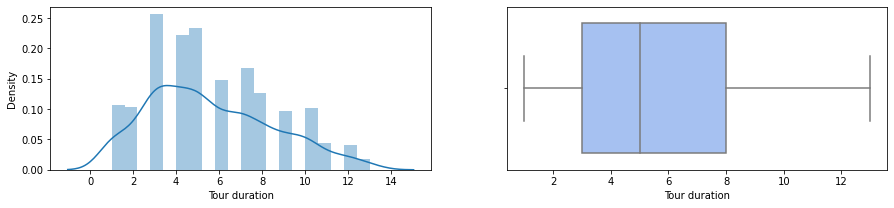

In [45]:
fig, axs = plt.subplots(1,2,figsize=(15, 3))
sns.distplot(df_qne['天数'],bins=20, kde=True,ax=axs[0],axlabel='Tour duration');
sns.boxplot(df_qne['天数'], ax = axs[1], color='#99befd', fliersize=1);
plt.xlabel("Tour duration")
plt.show()


D:\Python 3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


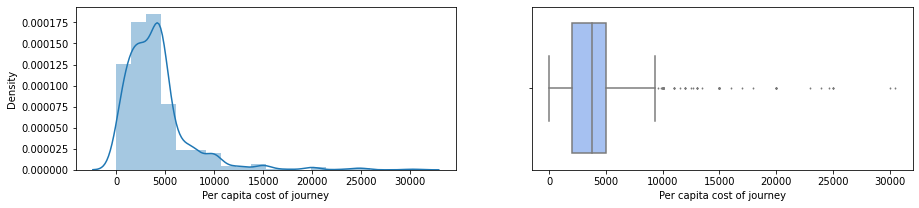

In [46]:
fig, axs = plt.subplots(1,2,figsize=(15, 3))
sns.distplot(df_qne['人均费用'],bins=20, kde=True,ax=axs[0],axlabel='Per capita cost of journey');
sns.boxplot(df_qne['人均费用'], ax = axs[1], color='#99befd', fliersize=1);
plt.xlabel("Per capita cost of journey")
plt.show()

D:\Python 3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


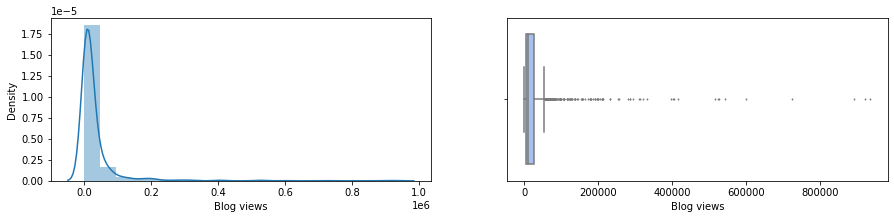

In [47]:
fig, axs = plt.subplots(1,2,figsize=(15, 3))
sns.distplot(df_qne['浏览次数'],bins=20, kde=True,ax=axs[0],axlabel='Blog views');
sns.boxplot(df_qne['浏览次数'], ax = axs[1], color='#99befd', fliersize=1);
plt.xlabel("Blog views")
plt.show()

In [48]:
df_qne_new=df_qne[['人均费用','浏览次数','天数']]

In [49]:
df_qne_new=df_qne_new.rename(columns={'人均费用':'Per capita cost of journey','浏览次数':'Blog views','天数':'Tour duration'})

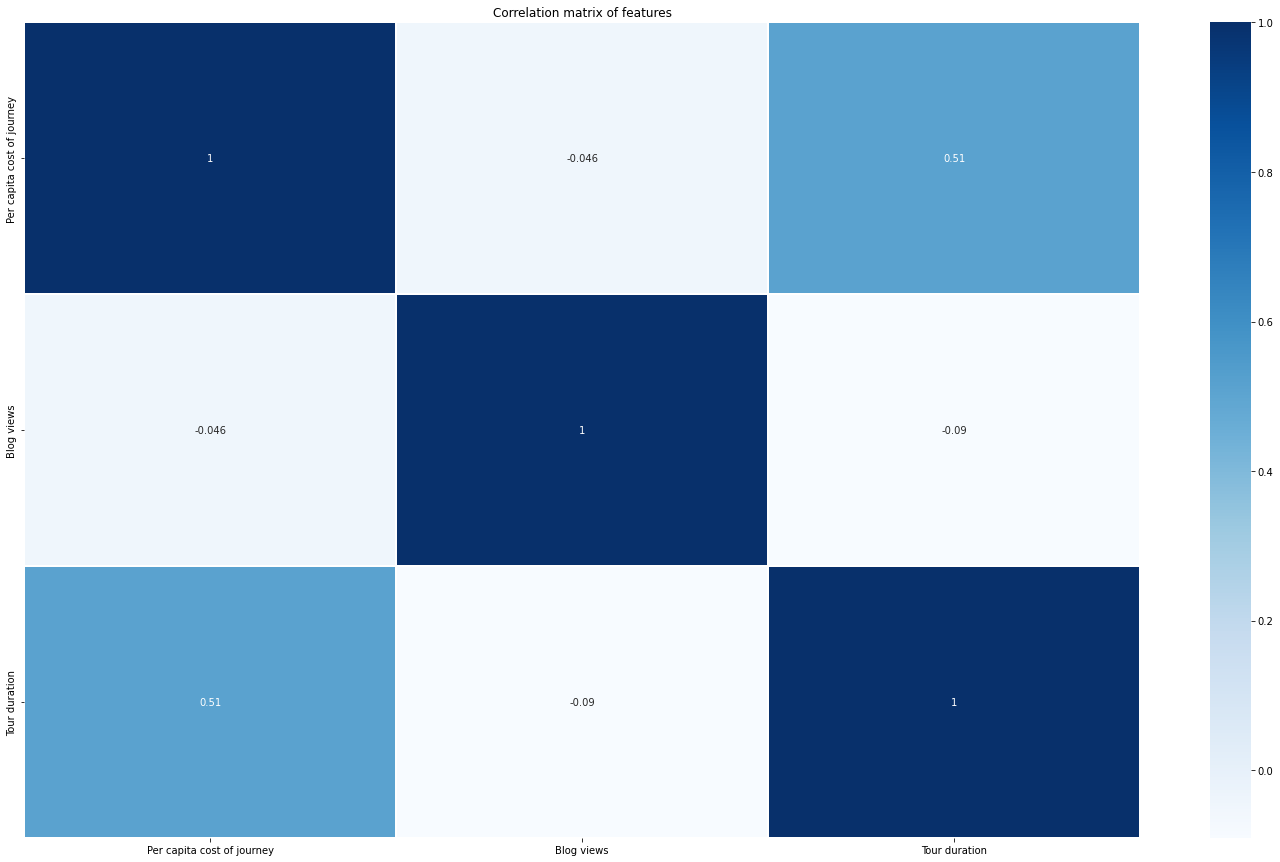

In [50]:
corr = df_qne_new.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

In [51]:
df_qne['人物'].value_counts()

三五好友    532
独自一人    260
家庭      229
情侣      191
亲子      130
闺蜜       94
学生        9
Name: 人物, dtype: int64

In [52]:
#新增'旅行月份'列，根据’出发时间‘的月份赋值
def Month(e):
    m = str(e).split('/')[1]
    if m=='01':
        return '一月'
    if m=='02':
        return '二月'
    if m=='03':
        return '三月'
    if m=='04':
        return '四月'
    if m=='05':
        return '五月'
    if m=='06':
        return '六月'
    if m=='07':
        return '七月'
    if m=='08':
        return '八月'
    if m=='09':
        return '九月'
    if m=='10':
        return '十月'
    if m=='11':
        return '十一月'
    if m=='12':
        return '十二月'

df_qne['旅行时间']=df_qne['出发时间'].apply(Month)
df_qne['出发时间']=pd.to_datetime(df_qne['出发时间'])
df_qne.head()
#print(type(df_qne['出发时间']))


,旅游地点,标题,出发时间,天数,人均费用,人物,玩法,详情URL,浏览次数,旅行时间
0,于都,【江西.于都】新长征再出发，不忘初心之旅,2021-11-19,4,2000.0,三五好友,深度游,https://travel.qunar.com/travelbook/note/7715869,173,十一月
1,南雄,秋日南雄邂逅一期一遇的金黄色浪漫，边遛娃边露营,2021-11-26,3,1000.0,亲子,短途周末,https://travel.qunar.com/travelbook/note/7715770,2029,十一月
2,庐山,庐山井冈山自驾四日游,2021-12-02,4,1200.0,家庭,自驾,https://travel.qunar.com/travelbook/note/7715430,2093,十二月
3,四明山,踏着深秋的落叶，去四明山来场自驾游,2021-11-24,2,663.0,情侣,第一次,https://travel.qunar.com/travelbook/note/7714964,6541,十一月
4,连南,KK粤北觅银杏 一叶一世界,2021-12-02,5,1200.0,家庭,自驾,https://travel.qunar.com/travelbook/note/7714958,3998,十二月


In [53]:
#提取旅游地点出现的次数top10
df_qne_1=df_qne
df_qne_1['旅游地点'].value_counts().head(10)

三亚      131
成都       35
重庆       34
西安       34
丽江       33
呼伦贝尔     33
厦门       23
长沙       19
南京       16
北京       16
Name: 旅游地点, dtype: int64

In [54]:
df_qne_1=df_qne
df_qne_1['旅游地点'].value_counts()

三亚    131
成都     35
重庆     34
西安     34
丽江     33
     ... 
乳源      1
夏河      1
遵义      1
宁国      1
宁安      1
Name: 旅游地点, Length: 444, dtype: int64

In [55]:
loc=df_qne_1['旅游地点'].value_counts().head(10).index.tolist()#把索引存进list
print(loc)

['三亚', '成都', '重庆', '西安', '丽江', '呼伦贝尔', '厦门', '长沙', '南京', '北京']


In [56]:
#查看top10地点的人均费用的均值
loc_data=df_qne_1[df_qne_1['旅游地点'].isin(loc)]
price_mean=round(loc_data['人均费用'].groupby(loc_data['旅游地点']).mean(),1)#约到小数点后1位
print(price_mean)

#提取人均费用列
price_mean_1=[4107.4,4745.9,3341.8,3983.8,3293.1,6405.2,5933.3,3263.5,2431.8,2145.3]

旅游地点
三亚      4122.0
丽江      4701.6
北京      2613.8
南京      2723.0
厦门      3631.8
呼伦贝尔    3998.0
成都      2873.1
西安      3399.2
重庆      2278.5
长沙      2752.7
Name: 人均费用, dtype: float64


In [57]:
df_qne_1['天数'].value_counts()

3     222
5     202
4     192
7     145
6     129
8     110
1      93
2      90
10     88
9      84
11     39
12     35
13     16
Name: 天数, dtype: int64

In [58]:
#以单位'天'增加一列
df_qne_1['旅行时长']=df_qne_1['天数'].apply(lambda x:str(x)+'天')
df_qne_1.head()

,旅游地点,标题,出发时间,天数,人均费用,人物,玩法,详情URL,浏览次数,旅行时间,旅行时长
0,于都,【江西.于都】新长征再出发，不忘初心之旅,2021-11-19,4,2000.0,三五好友,深度游,https://travel.qunar.com/travelbook/note/7715869,173,十一月,4天
1,南雄,秋日南雄邂逅一期一遇的金黄色浪漫，边遛娃边露营,2021-11-26,3,1000.0,亲子,短途周末,https://travel.qunar.com/travelbook/note/7715770,2029,十一月,3天
2,庐山,庐山井冈山自驾四日游,2021-12-02,4,1200.0,家庭,自驾,https://travel.qunar.com/travelbook/note/7715430,2093,十二月,4天
3,四明山,踏着深秋的落叶，去四明山来场自驾游,2021-11-24,2,663.0,情侣,第一次,https://travel.qunar.com/travelbook/note/7714964,6541,十一月,2天
4,连南,KK粤北觅银杏 一叶一世界,2021-12-02,5,1200.0,家庭,自驾,https://travel.qunar.com/travelbook/note/7714958,3998,十二月,5天


In [59]:
#各出行人物类型总计次数
df_qne_1['人物'].value_counts()

三五好友    532
独自一人    260
家庭      229
情侣      191
亲子      130
闺蜜       94
学生        9
Name: 人物, dtype: int64

In [60]:
#旅行月份总计次数
df_qne_1['旅行时间'].value_counts()

十二月    175
十月     151
一月     143
七月     140
五月     132
九月     131
八月     128
六月     123
十一月    111
四月     102
三月      63
二月      46
Name: 旅行时间, dtype: int64

In [61]:
#浏览次数按升序排列
m=df_qne_1['浏览次数'].sort_values(ascending=False).index[:].tolist()
df_qne_1=df_qne.loc[m] 
df_qne_1=df_qne_1.reset_index(drop=True)
df_qne_1

,旅游地点,标题,出发时间,天数,人均费用,人物,玩法,详情URL,浏览次数,旅行时间,旅行时长
0,伊尔库茨克,【蓝白光年】贝加尔湖手机摄影纪行,2019-01-24,7,6400.00,情侣,深度游,https://travel.qunar.com/travelbook/note/7566201,935000,一月,7天
1,广州,再遇南沙，感受它的万种风情,2020-07-23,4,4500.00,三五好友,深度游,https://travel.qunar.com/travelbook/note/7607308,920000,七月,4天
2,绍兴,上虞3天2晚深度游，感受曹娥江畔这座绝美的江南小城,2020-08-15,3,4453.46,三五好友,深度游,https://travel.qunar.com/travelbook/note/7617149,892000,八月,3天
3,南昌,不虚此行！南昌井冈山5-7天人文/红色/古迹/风光/网红店全收罗,2021-05-01,7,3800.00,家庭,第一次,https://travel.qunar.com/travelbook/note/7678770,723000,五月,7天
4,伊犁,你好巩留丨圆梦新疆，遇见天堂,2021-06-08,5,4453.46,三五好友,深度游,https://travel.qunar.com/travelbook/note/7684246,600000,六月,5天
...,...,...,...,...,...,...,...,...,...,...,...
1440,杭州,桂香三天竺（带妈妈享周末）,2021-10-30,2,500.00,亲子,短途周末,https://travel.qunar.com/travelbook/note/7712039,220,十月,2天
1441,成都,2021中秋川渝7日游,2021-09-19,7,4453.46,独自一人,中秋节,https://travel.qunar.com/travelbook/note/7702361,220,九月,7天
1442,于都,【江西.于都】新长征再出发，不忘初心之旅,2021-11-19,4,2000.00,三五好友,深度游,https://travel.qunar.com/travelbook/note/7715869,173,十一月,4天
1443,平潭,台风天的海上奇遇记--福建平潭周末游,2021-06-22,3,1500.00,三五好友,第一次,https://travel.qunar.com/travelbook/note/7684432,89,六月,3天


# **数据可视化**

### **1. 旅游胜地Top10**

In [62]:
# 提取数据特征
m2 = df_qne_1['旅游地点'].value_counts().head(10).index.tolist()  #top10地点排序
n2 = df_qne_1['旅游地点'].value_counts().head(10).values.tolist() #top10地点出现次数

In [63]:
bar=(
    Bar(init_opts=opts.InitOpts(height='500px',width='1000px',theme='dark'))
    .add_xaxis(m2)
    .add_yaxis(
        '目的地Top10',
        n2,
        label_opts=opts.LabelOpts(is_show=True,position='top'),
        itemstyle_opts=opts.ItemStyleOpts(
            color=JsCode("""new echarts.graphic.LinearGradient(
            0, 0, 0, 1,[{offset: 0,color: 'rgb(255,99,71)'}, {offset: 1,color: 'rgb(32,178,170)'}])
            """
            )
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title='目的地Top10'),
            xaxis_opts=opts.AxisOpts(name='景点名称',
            type_='category',                                           
            axislabel_opts=opts.LabelOpts(rotate=90),
        ),
        yaxis_opts=opts.AxisOpts(
            name='数量',
            min_=0,
            max_=120.0,
            splitline_opts=opts.SplitLineOpts(is_show=True,linestyle_opts=opts.LineStyleOpts(type_='dash'))
        ),
        tooltip_opts=opts.TooltipOpts(trigger='axis',axis_pointer_type='cross')
    )

    .set_series_opts(
        markline_opts=opts.MarkLineOpts(
            data=[
                opts.MarkLineItem(type_='average',name='均值'),
                opts.MarkLineItem(type_='max',name='最大值'),
                opts.MarkLineItem(type_='min',name='最小值'),
            ]
        )
    )
)
bar.render_notebook()

In [64]:
#make_snapshot(snapshot, bar.render(), "output4.png")

### **2. 旅游胜地Top10的人均费用可视化**

In [65]:
bar=(
    Bar(init_opts=opts.InitOpts(height='500px',width='1000px',theme='dark'))
    .add_xaxis(loc)
    .add_yaxis(
        '人均费用',
        price_mean_1,
        label_opts=opts.LabelOpts(is_show=True,position='top'),
        itemstyle_opts=opts.ItemStyleOpts(
            color=JsCode("""new echarts.graphic.LinearGradient(
            0, 0, 0, 1,[{offset: 0,color: 'rgb(255,99,71)'}, {offset: 1,color: 'rgb(32,178,170)'}])
            """
            )
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title='各景点人均费用'),
            xaxis_opts=opts.AxisOpts(name='景点名称',
            type_='category',                                           
            axislabel_opts=opts.LabelOpts(rotate=90),
        ),
        yaxis_opts=opts.AxisOpts(
            name='数量',
            min_=0,
            max_=8000.0,
            splitline_opts=opts.SplitLineOpts(is_show=True,linestyle_opts=opts.LineStyleOpts(type_='dash'))
        ),
        tooltip_opts=opts.TooltipOpts(trigger='axis',axis_pointer_type='cross')
    )

    .set_series_opts(
        markline_opts=opts.MarkLineOpts(
            data=[
                opts.MarkLineItem(type_='average',name='均值'),
                opts.MarkLineItem(type_='max',name='最大值'),
                opts.MarkLineItem(type_='min',name='最小值'),
            ]
        )
    )
)
bar.render_notebook()

In [66]:
#make_snapshot(snapshot, bar.render(), "output5.png")

### **2.3 出游方式可视化**

In [67]:
#提取数据特征---人物列出现次数升序排序
m1 = df_qne_1['人物'].value_counts().index.tolist()  
n1 = df_qne_1['人物'].value_counts().values.tolist()
print(m1,n1)

['三五好友', '独自一人', '家庭', '情侣', '亲子', '闺蜜', '学生'] [532, 260, 229, 191, 130, 94, 9]


In [68]:
pie = (Pie(init_opts=opts.InitOpts(theme='dark', width='1000px', height='800px'))
       .add("", [z for z in zip(m1,n1)],
            radius=["40%", "65%"])
       .set_global_opts(title_opts=opts.TitleOpts(title="去哪儿\n\n出游结伴方式", pos_left='center', pos_top='center',
                                               title_textstyle_opts=opts.TextStyleOpts(
                                                   color='#FF6A6A', font_size=30, font_weight='bold'),
                                               ),
                        visualmap_opts=opts.VisualMapOpts(is_show=False, 
                                          min_=38,
                                          max_=641,
                                          is_piecewise=False,
                                          dimension=0,
                                          range_color=['#9400D3', '#008afb', '#ffec4a', '#FFA500','#ce5777']),
                        legend_opts=opts.LegendOpts(is_show=False, pos_top='5%'),
                        )
       .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}", font_size=12),
                        tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{b}: {c}"),
                        itemstyle_opts={"normal": {
                                                    "barBorderRadius": [30, 30, 30, 30],
                                                    'shadowBlur': 10,
                                                    'shadowColor': 'rgba(0,191,255,0.5)',
                                                    'shadowOffsetY': 1,
                                                    'opacity': 0.8
                                                }
                                       })
        
                        )
pie.render_notebook()

In [69]:
#make_snapshot(snapshot, pie.render(), "output6.png")

### **2.4 玩法可视化**

In [70]:
m0 = df_qne_1['玩法'].value_counts().index.tolist()  
n0 = df_qne_1['玩法'].value_counts().values.tolist()
print(m0,n0)

['深度游', '第一次', '自驾', '短途周末', '美食', '环游', '摄影', '穷游', '徒步', '海滨海岛', '古镇', '购物', '赏秋', '夏季', '五一', '毕业游', '国庆', '骑行', '冬季', '温泉', '游轮', '蜜月', '中秋节', '踏春', '春节', '跨年', '暑假', '端午', '清明', '潜水', '赏樱', '寒假', '滑雪', '婚纱', '圣诞', '探险'] [474, 330, 224, 131, 61, 36, 26, 23, 23, 16, 15, 7, 7, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1]


In [71]:
from pyecharts.faker import Faker
v = Faker.choose()
pie = (
    Pie()
    .add(
        "",
        [z for z in zip(m0,n0)],
        radius=["50%", "75%"],
        center=["20%", "60%"],
        rosetype="radius",
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add(
        "",
        [z for z in zip(m0,n0)],
        radius=["40%", "60%"],
        center=["70%", "55%"],
        rosetype="area",
    )
    
)

In [72]:
pie.render_notebook()

In [73]:
#make_snapshot(snapshot, pie.render(), "output7.png")

### **2.5 出游时间可视化**

In [74]:
#提取数据特征---2021
m3 = df_qne_1['出发时间'].value_counts().sort_index()[:]
m4 = m3['2021'].index
n4 = m3['2021'].values

In [75]:
line = (
    Line()
    .add_xaxis(m4.tolist())
    .add_yaxis('',n4.tolist())
)
line.render_notebook()

In [76]:
#make_snapshot(snapshot, line.render(), "output8.png")

### **2.6 出游天数分析**

In [77]:
m7 = df_qne_1['旅行时长'].value_counts().index.tolist()
n7 = df_qne_1['旅行时长'].value_counts().values.tolist()
data_day = df_qne_1['旅行时长'].value_counts().sort_values()

In [78]:
bar = (
    Bar(init_opts=opts.InitOpts(theme='dark', width='1000px',height ='500px'))
    .add_xaxis(data_day.index.tolist())
    .add_yaxis('',data_day.values.tolist())
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                       position='insideRight',
                                                       font_style='italic'),
                            itemstyle_opts=opts.ItemStyleOpts(
                                color=JsCode("""new echarts.graphic.LinearGradient(1, 0, 0, 0, 
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(255,99,71)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(32,178,170)'
                                             }])"""))
                            )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="旅行时长"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
        legend_opts=opts.LegendOpts(is_show=True))
    .reversal_axis()
)
bar.render_notebook()

In [79]:
#make_snapshot(snapshot, bar.render(), "output9.png")

### **2.8 标题热词可视化** 

In [80]:
import jieba
import jieba.analyse
import re

In [81]:
#定义分割标题原则
punc = '~`!#$%^&*()_+-=|\';":/.,?><~·！@#￥%……&*（）——+-=“：’；、。，？》《{}【】'
def remove_fuhao(e):
    short = re.sub(r"[%s]+" % punc, " ", e)
    return short
def cut_word(text):
    text = jieba.cut_for_search(str(text))
    return ' '.join(text)

In [82]:
df_qne_2 = df_qne_1

In [83]:
#将标题列分割出各词语并定义新列‘简介’
df_qne_2['简介'] = df_qne_2['标题'].apply(remove_fuhao).apply(cut_word)
df_qne_2.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\CYBERO~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.515 seconds.
Prefix dict has been built successfully.


,旅游地点,标题,出发时间,天数,人均费用,人物,玩法,详情URL,浏览次数,旅行时间,旅行时长,简介
0,伊尔库茨克,【蓝白光年】贝加尔湖手机摄影纪行,2019-01-24,7,6400.00,情侣,深度游,https://travel.qunar.com/travelbook/note/7566201,935000,一月,7天,蓝 白光 年 贝加尔 贝加尔湖 手机 摄影 纪行
1,广州,再遇南沙，感受它的万种风情,2020-07-23,4,4500.00,三五好友,深度游,https://travel.qunar.com/travelbook/note/7607308,920000,七月,4天,再遇 南沙 感受 它 的 万种 风情 万种风情
2,绍兴,上虞3天2晚深度游，感受曹娥江畔这座绝美的江南小城,2020-08-15,3,4453.46,三五好友,深度游,https://travel.qunar.com/travelbook/note/7617149,892000,八月,3天,上虞 天 晚 深度 游 感受 曹娥江 畔 这座 绝 美的 江南 小城
3,南昌,不虚此行！南昌井冈山5-7天人文/红色/古迹/风光/网红店全收罗,2021-05-01,7,3800.00,家庭,第一次,https://travel.qunar.com/travelbook/note/7678770,723000,五月,7天,不虚 此行 不虚此行 南昌 井冈 冈山 井冈山 天 人文 红色 古迹 ...
4,伊犁,你好巩留丨圆梦新疆，遇见天堂,2021-06-08,5,4453.46,三五好友,深度游,https://travel.qunar.com/travelbook/note/7684246,600000,六月,5天,你好 巩留 丨 圆梦 新疆 遇见 天堂


In [84]:
#新建文本储存热词
word = df_qne_2['简介'].values.tolist()
fb = open(r'.\travel_text.txt','w',encoding='utf-8')
for i in range(len(word)):
    fb.write(word[i])
with open(r'.\travel_text.txt','r',encoding='utf-8')as f:
    words = f.read()
    f.close

In [85]:
#热词分析---根据词语出现频率设定词语权重
jieba.analyse.set_stop_words(r'C:/Users/Cyberolic/Desktop/stopwords.txt')
new_words = jieba.analyse.textrank(words, topK=30, withWeight=True)
print(new_words)

[('自驾', 1.0), ('三亚', 0.8706617662269559), ('旅行', 0.5684740047665641), ('美食', 0.4577127303178732), ('世界', 0.39203151815793535), ('亲子', 0.3329610123571005), ('游记', 0.2975805000258081), ('旅游', 0.26498774832397043), ('景点', 0.26436811387337505), ('成都', 0.26361872191389996), ('古城', 0.25972778523830725), ('打卡', 0.23960125624691658), ('重庆', 0.23721818320869215), ('海南', 0.21755288263447087), ('江南', 0.21432499884845654), ('西北', 0.20632106654580876), ('感受', 0.1975919140721447), ('文化', 0.18987901331189774), ('邂逅', 0.18585934058522305), ('遇见', 0.17753659263043198), ('环线', 0.17614302387199218), ('冰雪', 0.17063674943093377), ('时光', 0.1696501373317702), ('日本', 0.16630533975418474), ('体验', 0.16428146651711154), ('西安', 0.16102052756597832), ('度假', 0.1605293785448786), ('人间', 0.1587035850146987), ('玩转', 0.15492144306582176), ('丽江', 0.15282269539130666)]


In [86]:
word1 = []
num1 = []
for i in range(len(new_words)):    
    word1.append(new_words[i][0])
    num1.append(new_words[i][1])

In [87]:
wordcloud= (
    WordCloud()
    .add('热词云分析',[z for z in zip(word1,num1)],word_size_range=[25,80],shape = 'diamond')
)
wordcloud.render_notebook()

In [89]:
make_snapshot(snapshot, wordcloud.render(), "output10.png")